In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
img = cv2.imread("/content/drive/MyDrive/Dataset/iris_image.bmp",0)

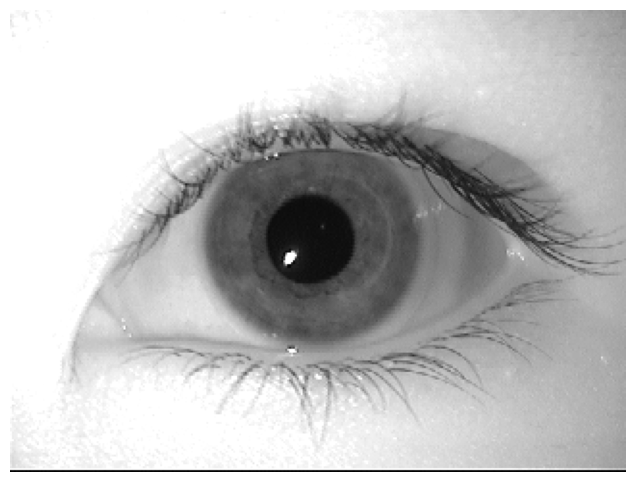

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(img , 'gray')
plt.axis('off')
plt.show()

In [47]:
 #generate random gaussian nouse
mean = 0
stdev = 100
noise = np.zeros(img.shape,np.uint8)
cv2.randn(noise , mean , stdev)

#add noise to the image
noisy_img = cv2.add(img,noise)


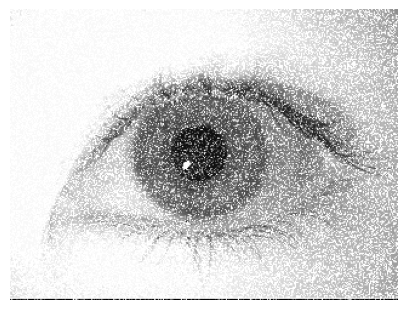

In [48]:
plt.figure(figsize = (5,5))
plt.imshow(noisy_img , 'gray')
plt.axis('off')
plt.show()

In [49]:
#transform the noisy image into frequency domain , f ---> F
F_noisy = np.fft.fft2(noisy_img) #Fourier transfom of noisy image
Fshift_noisy = np.fft.fftshift(F_noisy) # to center the fourier transform

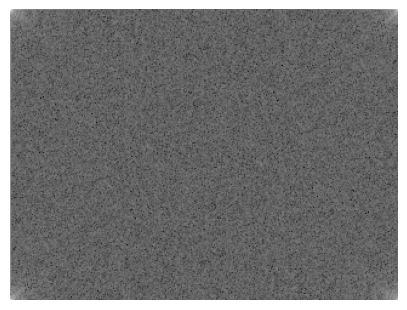

In [50]:
# displaying fourier transform
plt.figure(figsize = (5,5))
plt.imshow(np.log1p(np.abs(F_noisy)),cmap='gray') # just for scaling
plt.axis('off')
plt.show()

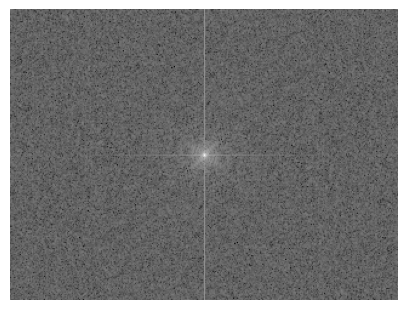

In [51]:
# displaying Center fourier transform
plt.figure(figsize = (5,5))
plt.imshow(np.log1p(np.abs(Fshift_noisy)),cmap='gray') # just for scaling
plt.axis('off')
plt.show()

In [52]:
np.abs(Fshift_noisy)

array([[23370.        , 15912.32720271,  9376.73950059, ...,
         4229.13473055,  9376.73950059, 15912.32720271],
       [ 9741.02837842,  9924.45731319,  9845.91541832, ...,
         4198.5626389 ,  3815.98659764,  2671.2215716 ],
       [ 7476.35018513,  8893.67813135, 11737.26077525, ...,
         2796.12252167, 18268.92292227, 11548.8907084 ],
       ...,
       [ 4835.05767624,  6279.41244666, 11106.73333745, ...,
         7868.73822175,  4551.07984278, 13319.11636094],
       [ 7476.35018513, 11548.8907084 , 18268.92292227, ...,
         7931.31359129, 11737.26077525,  8893.67813135],
       [ 9741.02837842,  2671.2215716 ,  3815.98659764, ...,
         8793.51701095,  9845.91541832,  9924.45731319]])

In [53]:
# cretae gaussian filter : low pass filter
M,N = img.shape
H = np.zeros((M,N), dtype = np.float32)
D0 = 10 # CUT OFF FREQUENCY
for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    H[u,v]=np.exp(-D**2/(2*D0*D0))


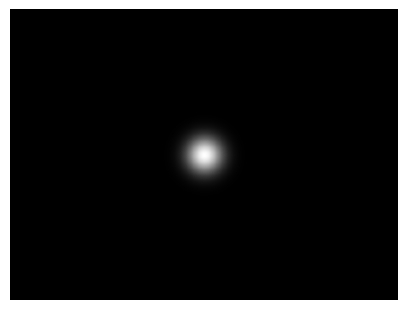

In [54]:
plt.figure(figsize=(5,5))
plt.imshow(H , 'gray')
plt.axis('off')
plt.show()

In [55]:
# image filtering : LPF
Gshift_LPF = Fshift_noisy * H
G = np.fft.ifftshift(Gshift_LPF)
g = np.abs(np.fft.ifft2(G))

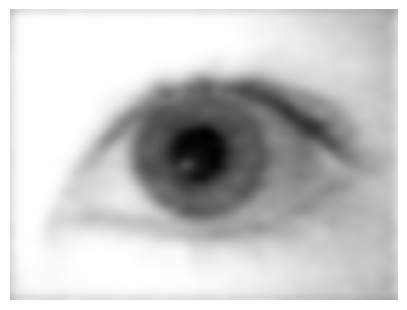

In [56]:
plt.figure(figsize = (5,5))
plt.imshow(g , cmap = 'gray')
plt.axis('off')
plt.show()

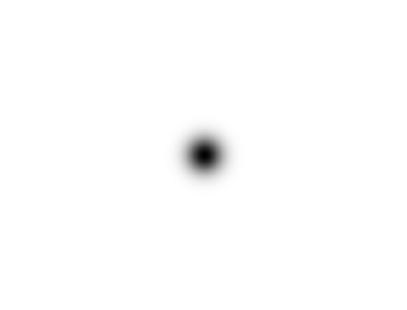

In [57]:
#Gaussian : high pass filter
HPF = 1-H
plt.figure(figsize = (5,5))
plt.imshow(HPF , cmap = 'gray')
plt.axis('off')
plt.show()

In [59]:
F_LPF = np.fft.fft2(g)
Fshift_LPF = np.fft.fftshift(F_LPF)



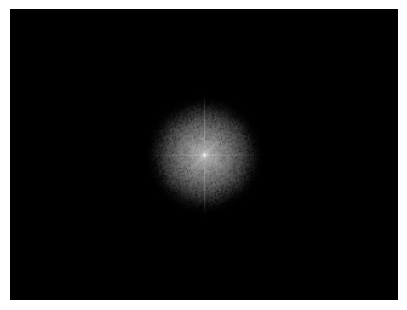

In [60]:
plt.figure(figsize = (5,5))
plt.imshow(np.log1p(np.abs(Fshift_LPF)) , cmap = 'gray')
plt.axis('off')
plt.show()

In [61]:
Gshift_HPF = Fshift_LPF * HPF
G = np.fft.ifftshift(Gshift_HPF)
g_HPF = np.abs(np.fft.ifft2(G))


In [63]:
g_HPF

array([[6.3257506 , 5.13000736, 4.02107324, ..., 9.334466  , 8.53391012,
        7.49809267],
       [5.67658139, 4.28242677, 2.99260136, ..., 9.26524607, 8.28651484,
        7.053248  ],
       [4.41249998, 2.84745188, 1.40520475, ..., 8.5321041 , 7.38342857,
        5.96979515],
       ...,
       [3.7654975 , 3.0627159 , 2.41707763, ..., 5.48923479, 5.04727211,
        4.45175543],
       [5.27303965, 4.44721393, 3.68297365, ..., 7.28299593, 6.77022562,
        6.07590287],
       [6.18900797, 5.19186312, 4.26669931, ..., 8.64625276, 8.00848992,
        7.16091176]])

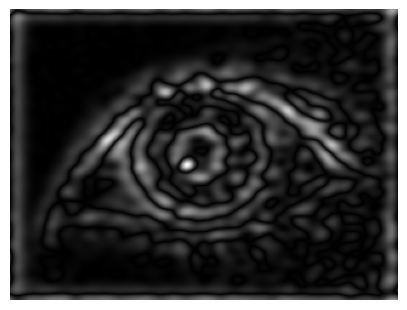

In [64]:
plt.figure(figsize = (5,5))
plt.imshow(g_HPF , cmap = 'gray')
plt.axis('off')
plt.show()